In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt


# Cleaning the dataset

In [2]:
df = pd.read_csv('top_anime_dataset_v2.csv')
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   english_name    8358 non-null   object 
 5   japanese_names  14954 non-null  object 
 6   score           15000 non-null  float64
 7   genres          13399 non-null  object 
 8   themes          9923 non-null   object 
 9   demographics    4408 non-null   object 
 10  synopsis        14532 non-null  object 
 11  type            14999 non-null  object 
 12  episodes        14888 non-null  float64
 13  premiered       4684 non-null   object 
 14  producers       9571 non-null   object 
 15  studios         12621 non-null  object 
 16  source          15000 non-null  object 
 17  duration        15000 non-null 

In [3]:
df.drop(columns = ['english_name','premiered','producers','rank','demographics'], inplace = True)
df.drop(columns = ['episodes', 'themes'], inplace = True)
df = df.fillna('unknown')


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   anime_id        15000 non-null  int64  
 1   anime_url       15000 non-null  object 
 2   image_url       15000 non-null  object 
 3   name            15000 non-null  object 
 4   japanese_names  15000 non-null  object 
 5   score           15000 non-null  float64
 6   genres          15000 non-null  object 
 7   synopsis        15000 non-null  object 
 8   type            15000 non-null  object 
 9   studios         15000 non-null  object 
 10  source          15000 non-null  object 
 11  duration        15000 non-null  object 
 12  rating          15000 non-null  object 
 13  popularity      15000 non-null  int64  
 14  favorites       15000 non-null  int64  
 15  scored_by       15000 non-null  int64  
 16  members         15000 non-null  int64  
dtypes: float64(1), int64(5), object

# Performing dataset analysis:

Number of animes according to genre

C:\Users\lucas\AppData\Local\Temp\ipykernel_23700\2690564051.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top.drop(index = 0, inplace = True)


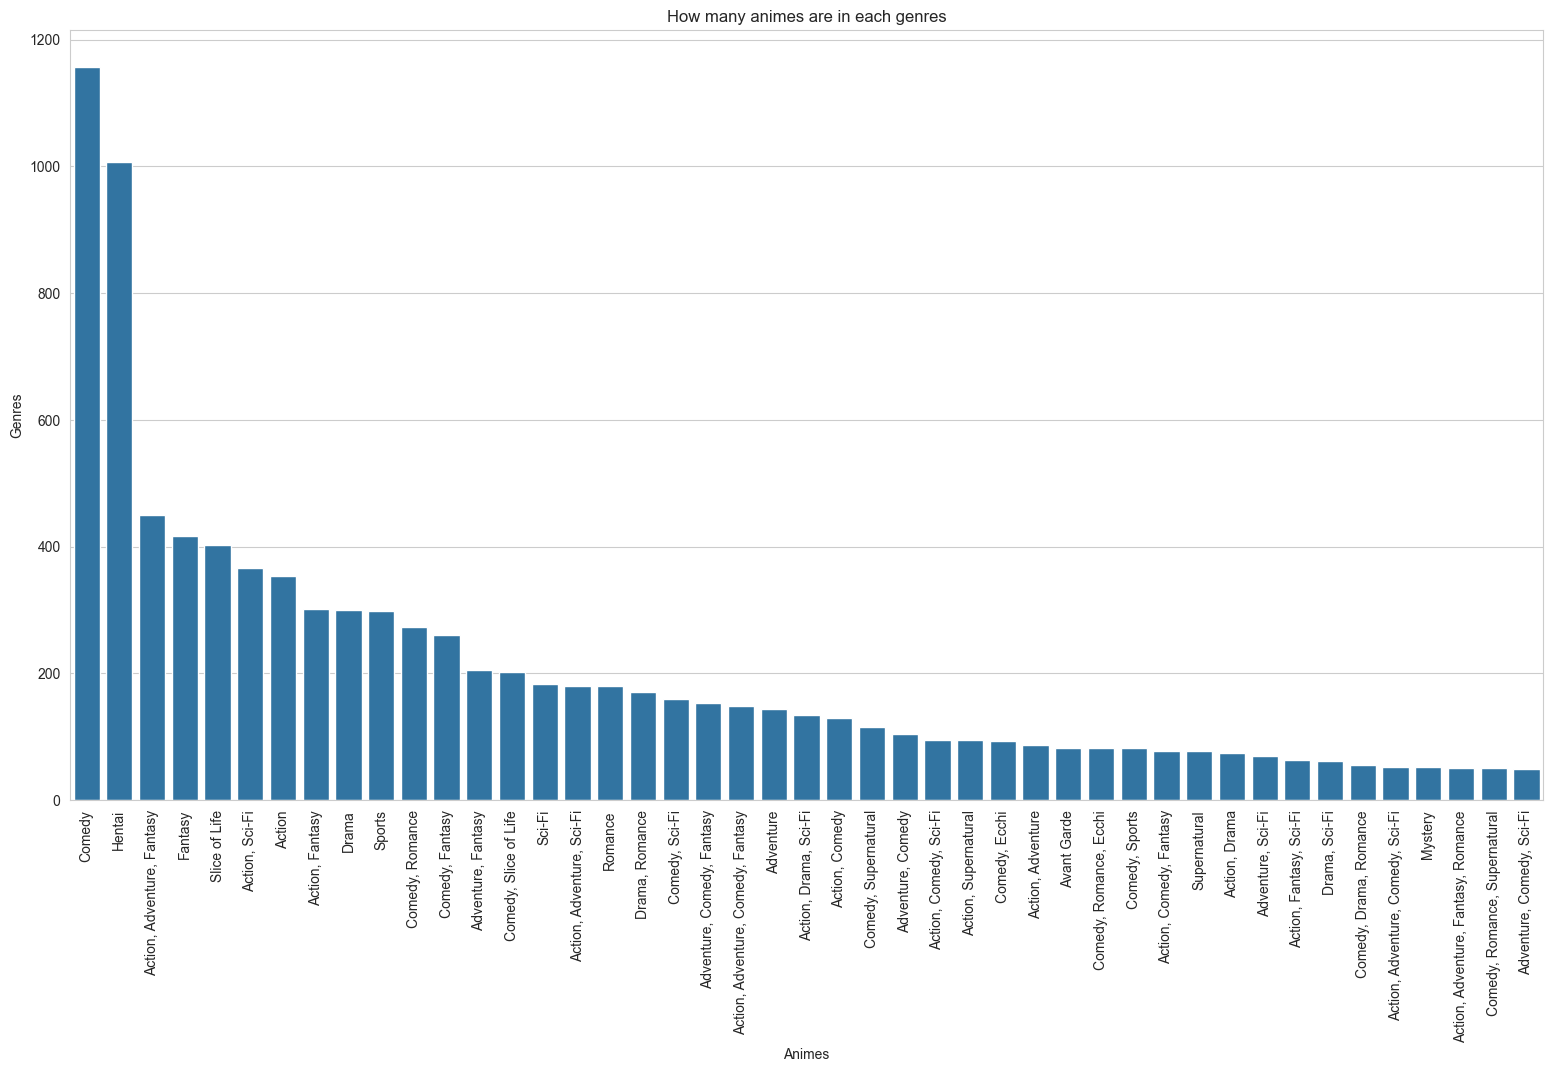

In [5]:
genreos = df['genres'].value_counts() 
genros = pd.DataFrame(genreos)
top = genros.query('count >= 50')
top.reset_index(inplace= True)
top.drop(index = 0, inplace = True)
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (19 ,10))
    grafico = sns.barplot(data = top, x = 'genres', y = 'count')
    grafico.set(title = 'How many animes are in each genres', xlabel = 'Animes', ylabel = 'Genres')
    plt.xticks(rotation = 90)
    plt.show()


Score for each anime genre

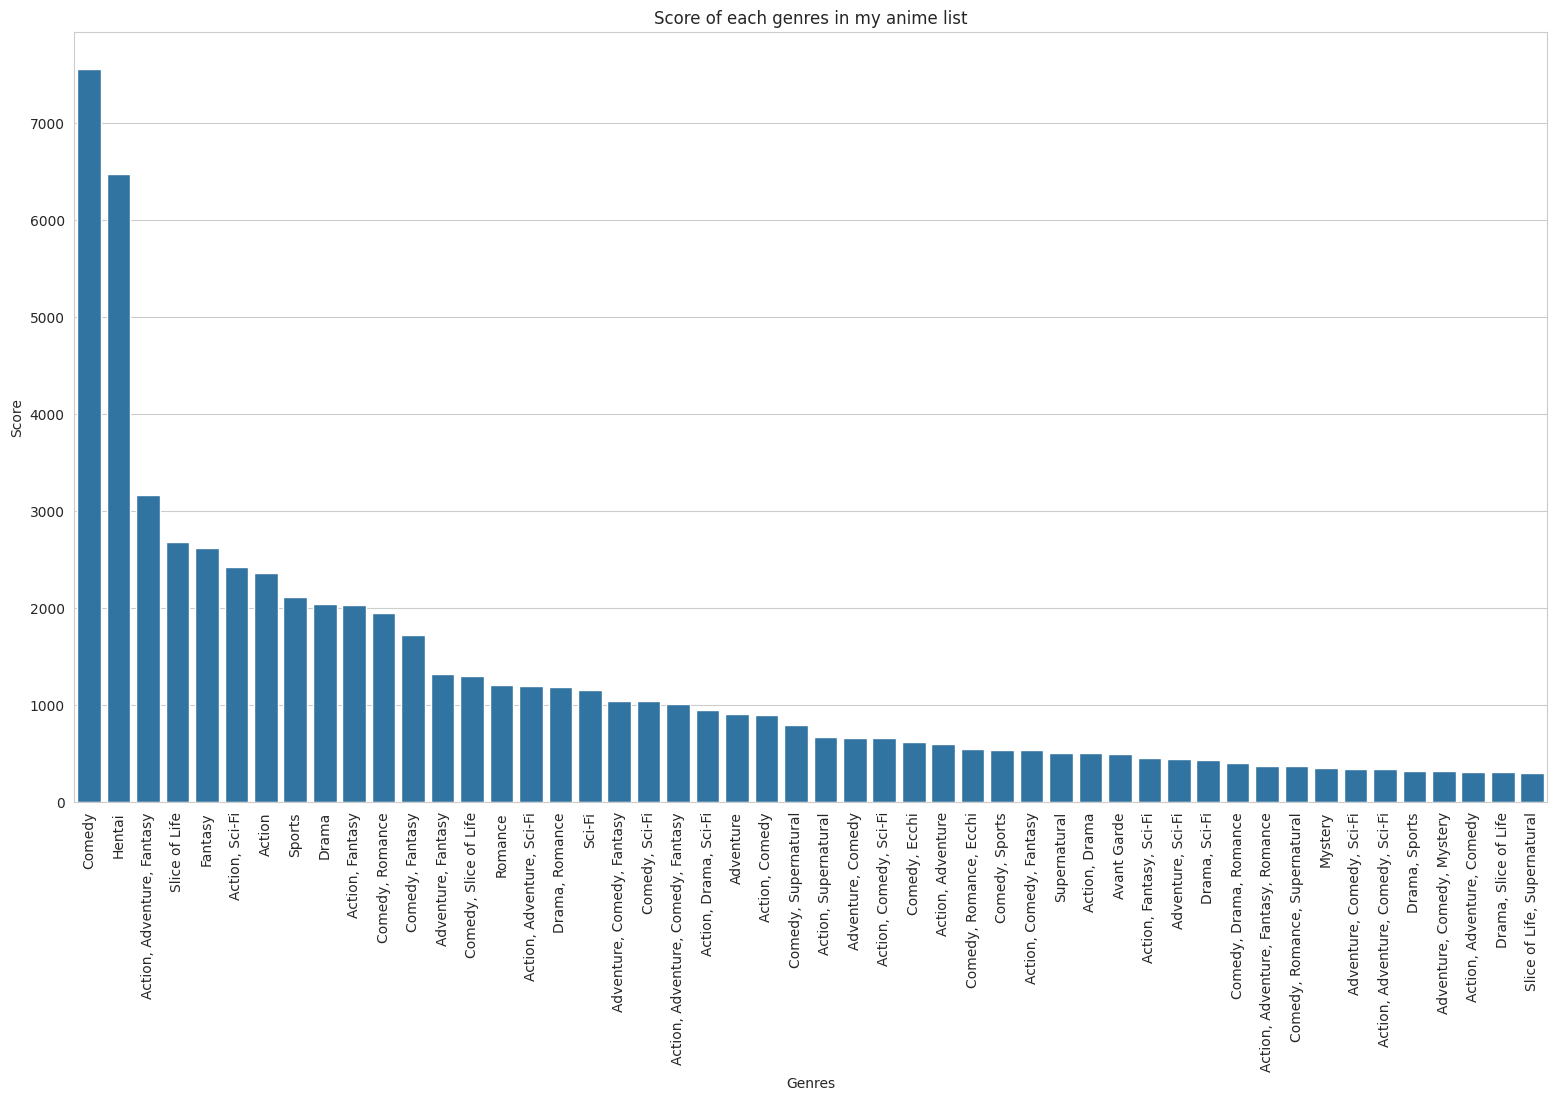

In [6]:
score_genre = df[['score','genres']].groupby('genres').sum().sort_values(by = 'score',ascending = False)
score_genre.reset_index(inplace= True)
score_genre.drop(index = 0, inplace = True)
score_genre_top50 = score_genre.head(50)
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (19,10))
    grafico = sns.barplot(data = score_genre_top50, x = 'genres', y = 'score')
    grafico.set(title = 'Score of each genres in my anime list', xlabel = 'Genres', ylabel = 'Score')
    plt.xticks(rotation = 90)
    plt.show

Top 50 best animes

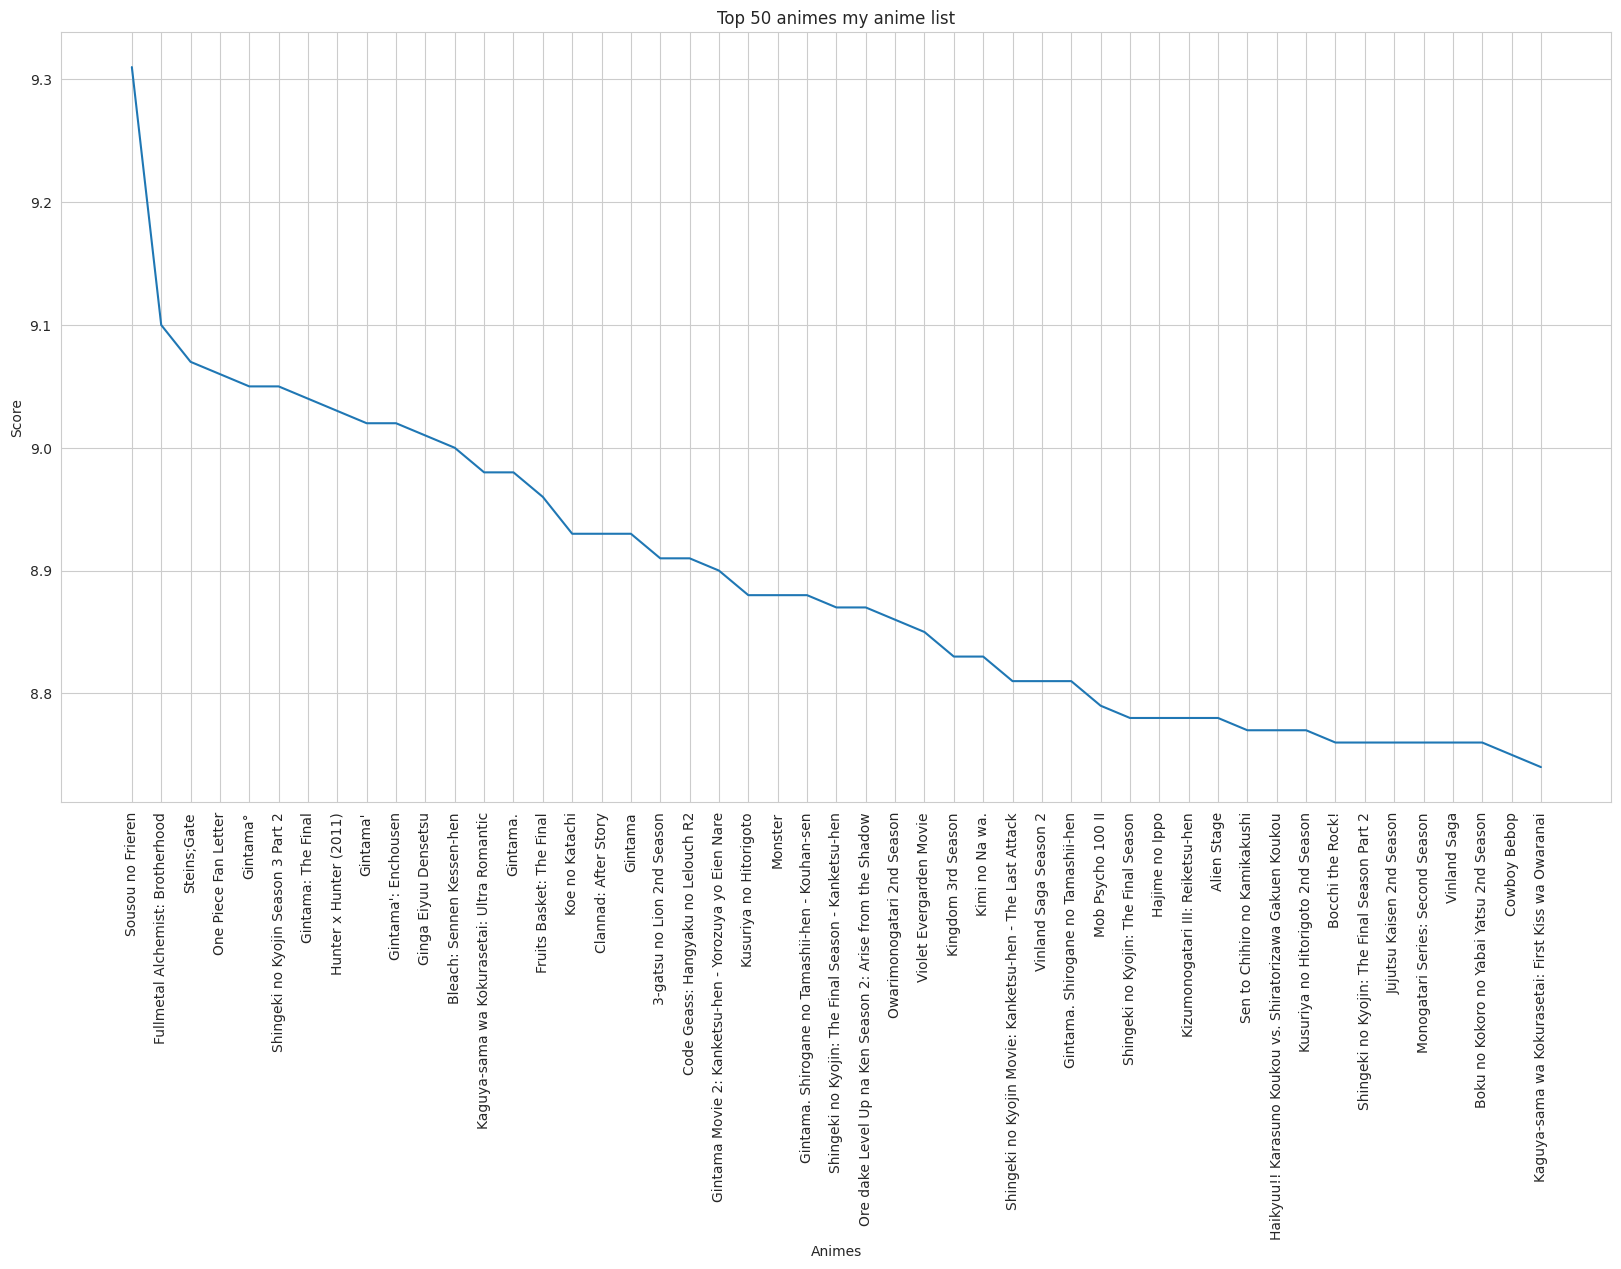

In [7]:
top_50_animes = df[['name','score']].sort_values(by = 'score',ascending= False).head(50)
top_50_favorites_animes =  df[['name','favorites']].sort_values(by = 'favorites', ascending = False).head(50).reset_index(drop= True)

with sns.axes_style('whitegrid'):
    plt.figure(figsize= (20,10))
    grafico_score = sns.lineplot(data = top_50_animes, x = 'name', y = 'score')
    grafico_score.set(title = 'Top 50 animes my anime list', xlabel = 'Animes', ylabel = 'Score')
    plt.xticks(rotation = 90)

In [8]:
top_50_animes

,name,score
0,Sousou no Frieren,9.31
1,Fullmetal Alchemist: Brotherhood,9.10
2,Steins;Gate,9.07
3,One Piece Fan Letter,9.06
5,Gintama°,9.05
4,Shingeki no Kyojin Season 3 Part 2,9.05
6,Gintama: The Final,9.04
7,Hunter x Hunter (2011),9.03
8,Gintama',9.02
9,Gintama': Enchousen,9.02


Top 50 favoritos animes

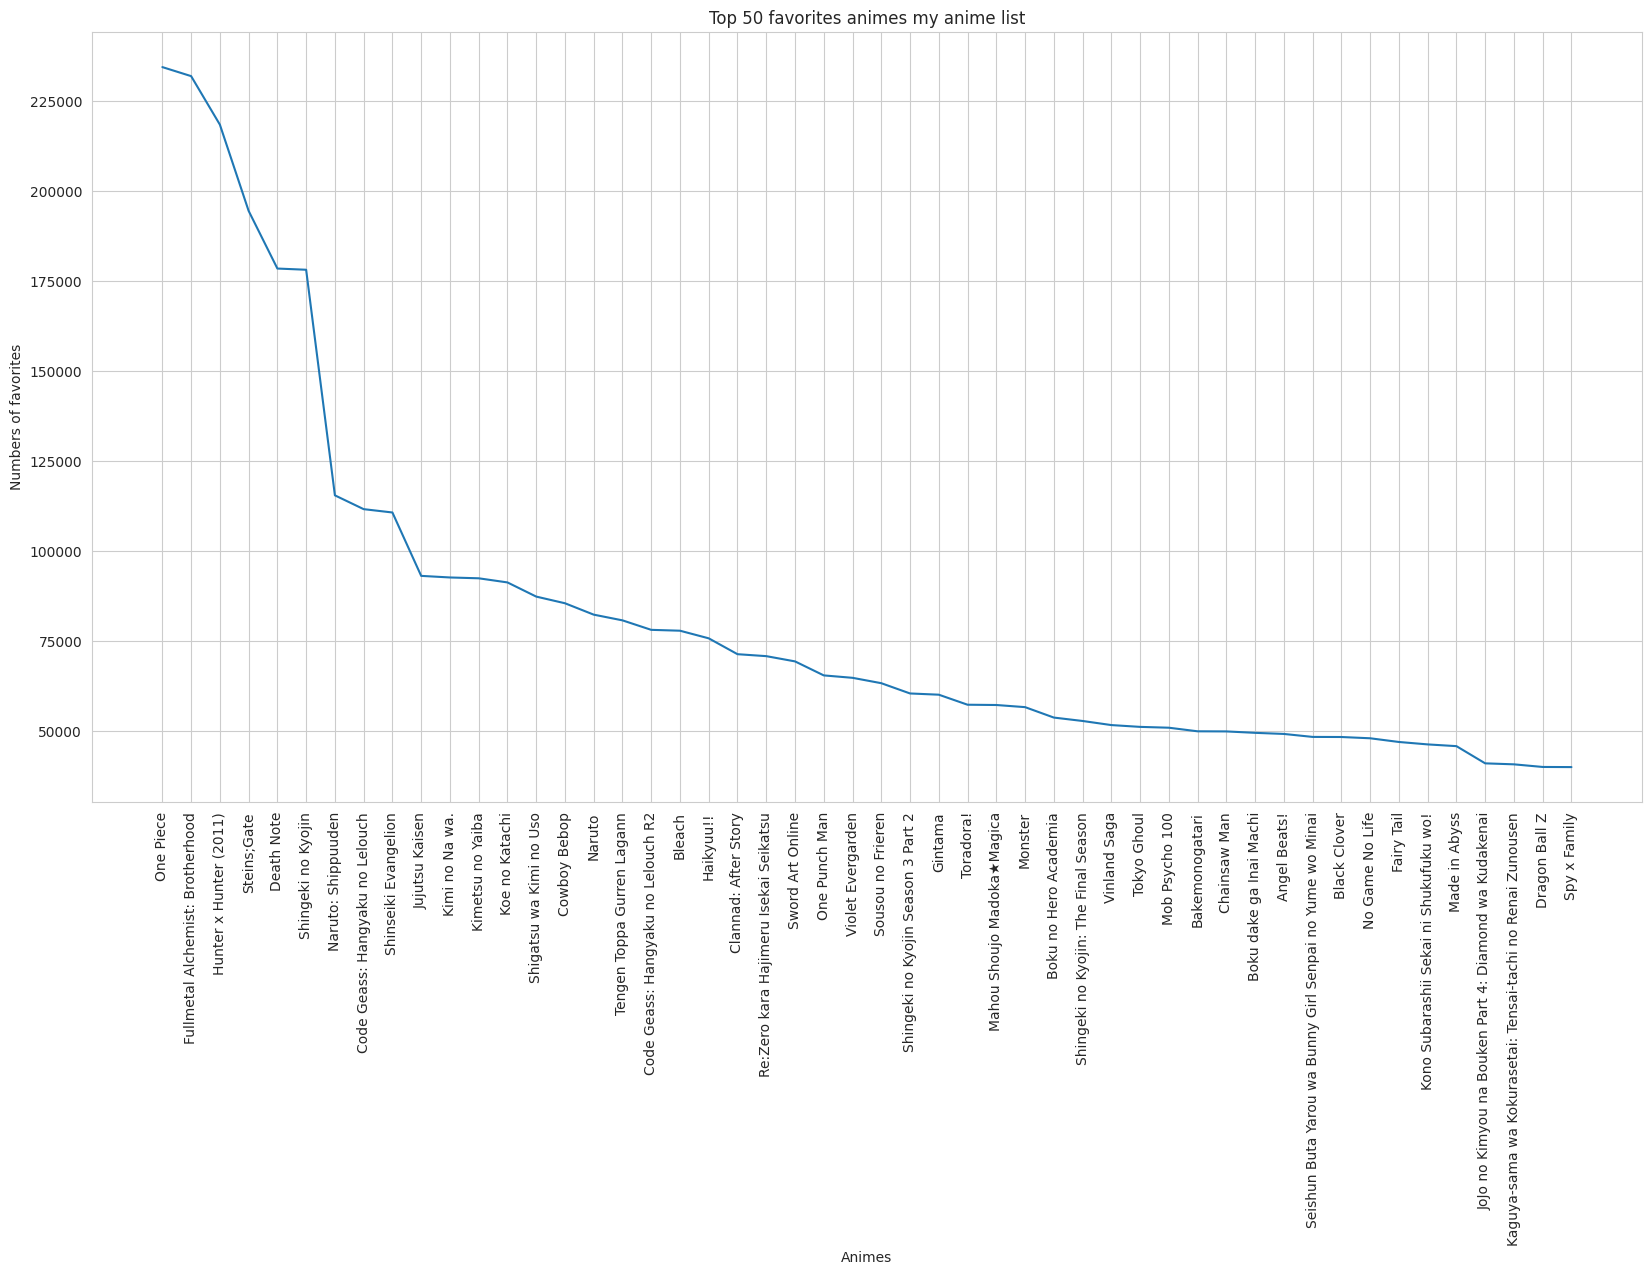

In [9]:
with sns.axes_style('whitegrid'):   
   plt.figure(figsize = (20,10))
   grafico_favoritos = sns.lineplot(data = top_50_favorites_animes , x = 'name', y = 'favorites')
   grafico_favoritos.set(title = 'Top 50 favorites animes my anime list', xlabel = 'Animes', ylabel = 'Numbers of favorites')
   plt.xticks(rotation = 90)

In [10]:
top_50_favorites_animes

,name,favorites
0,One Piece,234514
1,Fullmetal Alchemist: Brotherhood,232007
2,Hunter x Hunter (2011),218535
3,Steins;Gate,194580
4,Death Note,178560
5,Shingeki no Kyojin,178226
6,Naruto: Shippuuden,115564
7,Code Geass: Hangyaku no Lelouch,111729
8,Shinseiki Evangelion,110803
9,Jujutsu Kaisen,93197


Top 50 popularity animes

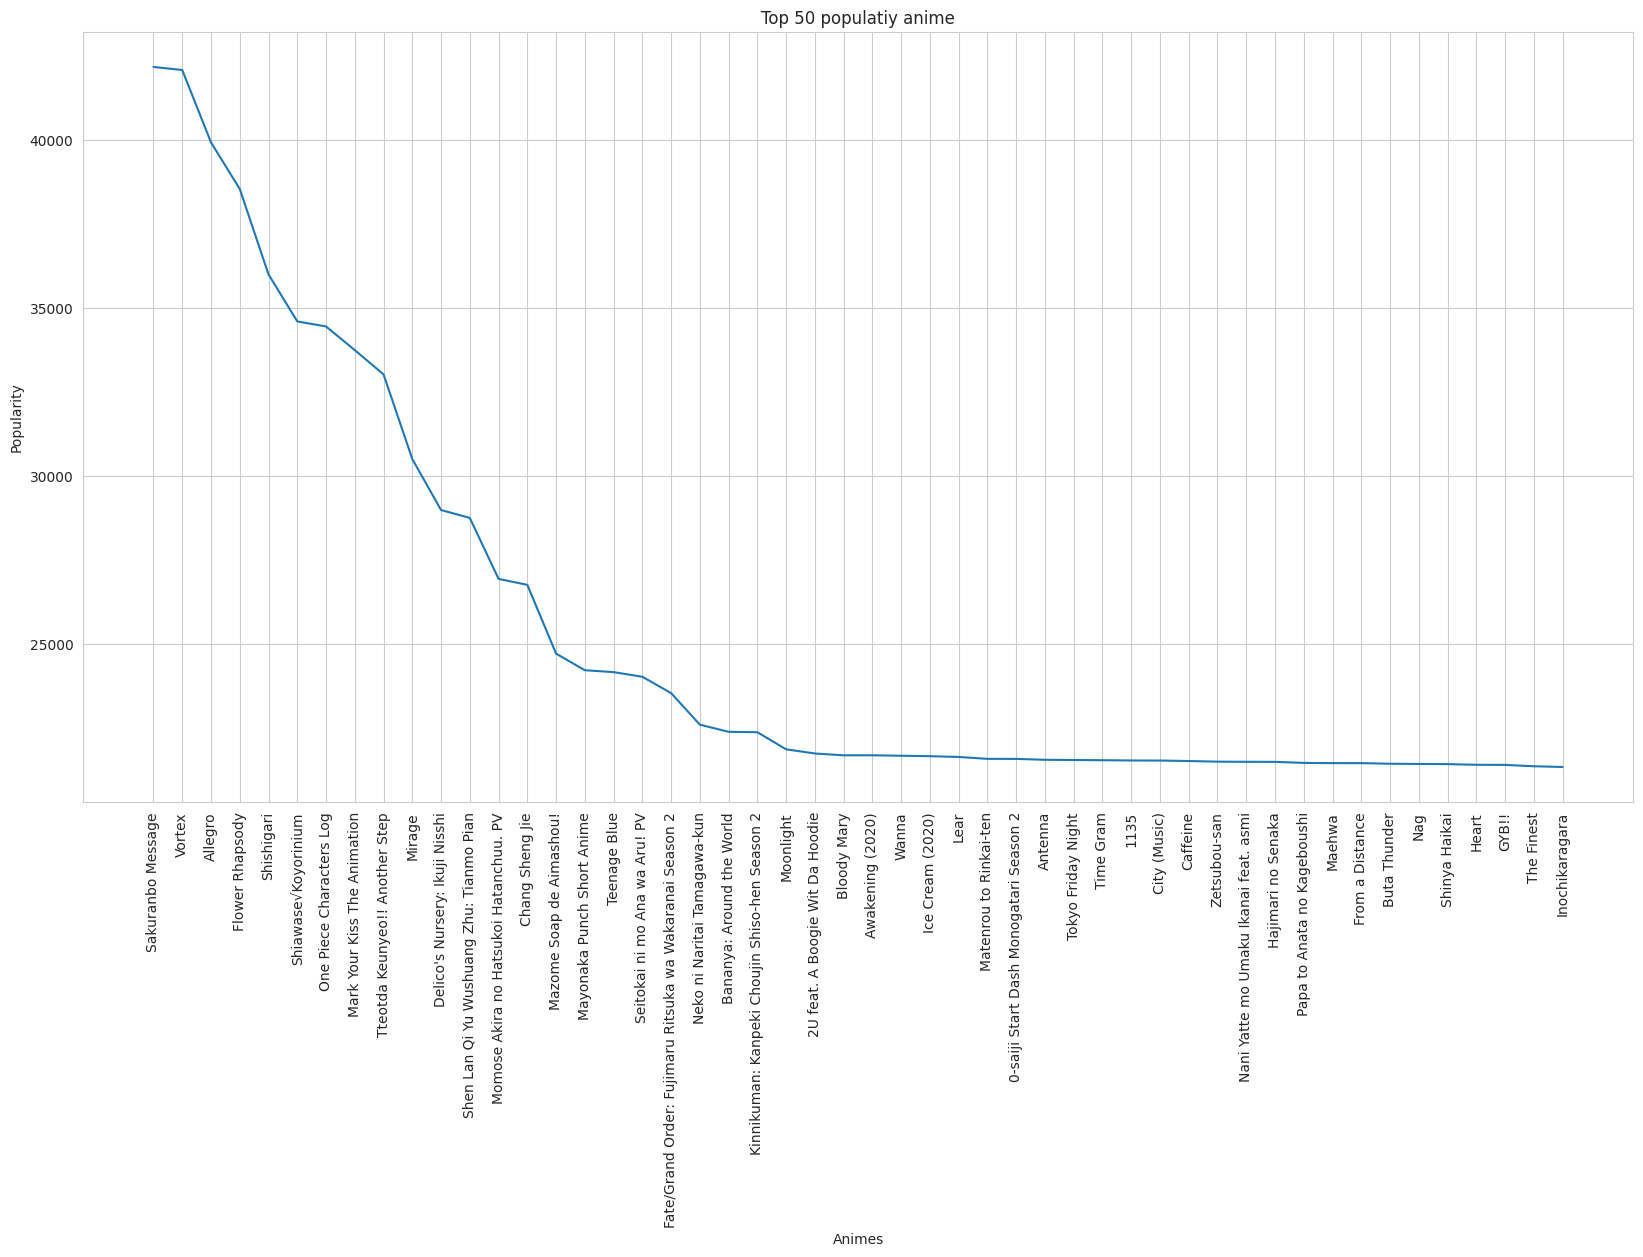

In [11]:
popularity = df[['name','popularity']].groupby('name').sum().sort_values(by = 'popularity', ascending= False).head(50)
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (20,10))
    grafico = sns.lineplot(data = popularity, x ='name', y = 'popularity')
    grafico.set(title = 'Top 50 populatiy anime', xlabel = 'Animes', ylabel = 'Popularity')
    plt.xticks(rotation = 90)


In [12]:
popularity

,popularity
name,
Sakuranbo Message,42170
Vortex,42080
Allegro,39926
Flower Rhapsody,38540
Shishigari,36000
Shiawase√Koyorinium,34600
One Piece Characters Log,34450
Mark Your Kiss The Animation,33746
Tteotda Keunyeo!! Another Step,33024


Quantity of each source

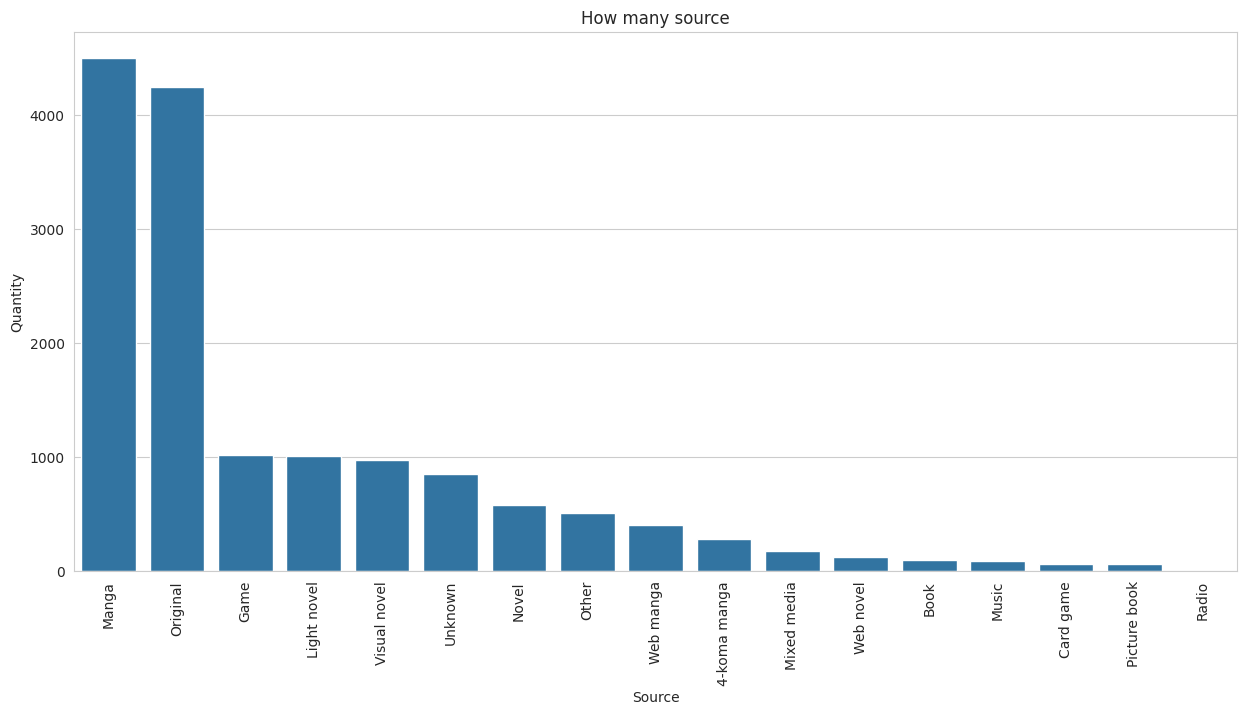

In [13]:
source = df['source'].value_counts()
source_pd = pd.DataFrame(source).reset_index()
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (15, 7))
    grafico = sns.barplot (data = source_pd, x = 'source', y = 'count')
    grafico.set(title = 'How many source', xlabel = 'Source', ylabel = 'Quantity')
    plt.xticks(rotation = 90)



In [14]:
source_pd

,source,count
0,Manga,4500
1,Original,4248
2,Game,1017
3,Light novel,1010
4,Visual novel,977
5,Unknown,854
6,Novel,583
7,Other,510
8,Web manga,402
9,4-koma manga,281


Number of members per source

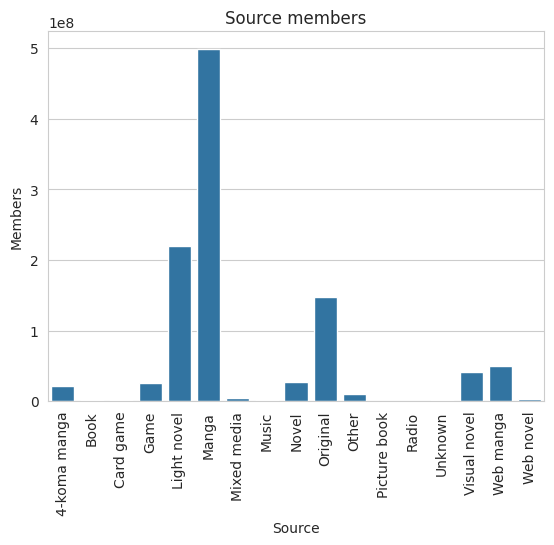

In [15]:
members = df[['source','members']].groupby('source').sum().reset_index()
members
with sns.axes_style('whitegrid'):
    grafico = sns.barplot(data = members , x = 'source', y = 'members')
    grafico.set(title = 'Source members', xlabel = 'Source', ylabel ='Members')
    plt.xticks(rotation = 90)


In [16]:
members

,source,members
0,4-koma manga,21204267
1,Book,1026725
2,Card game,1759439
3,Game,25530308
4,Light novel,219130919
5,Manga,498665740
6,Mixed media,4870871
7,Music,985501
8,Novel,27125898
9,Original,147738688


Score by stuido

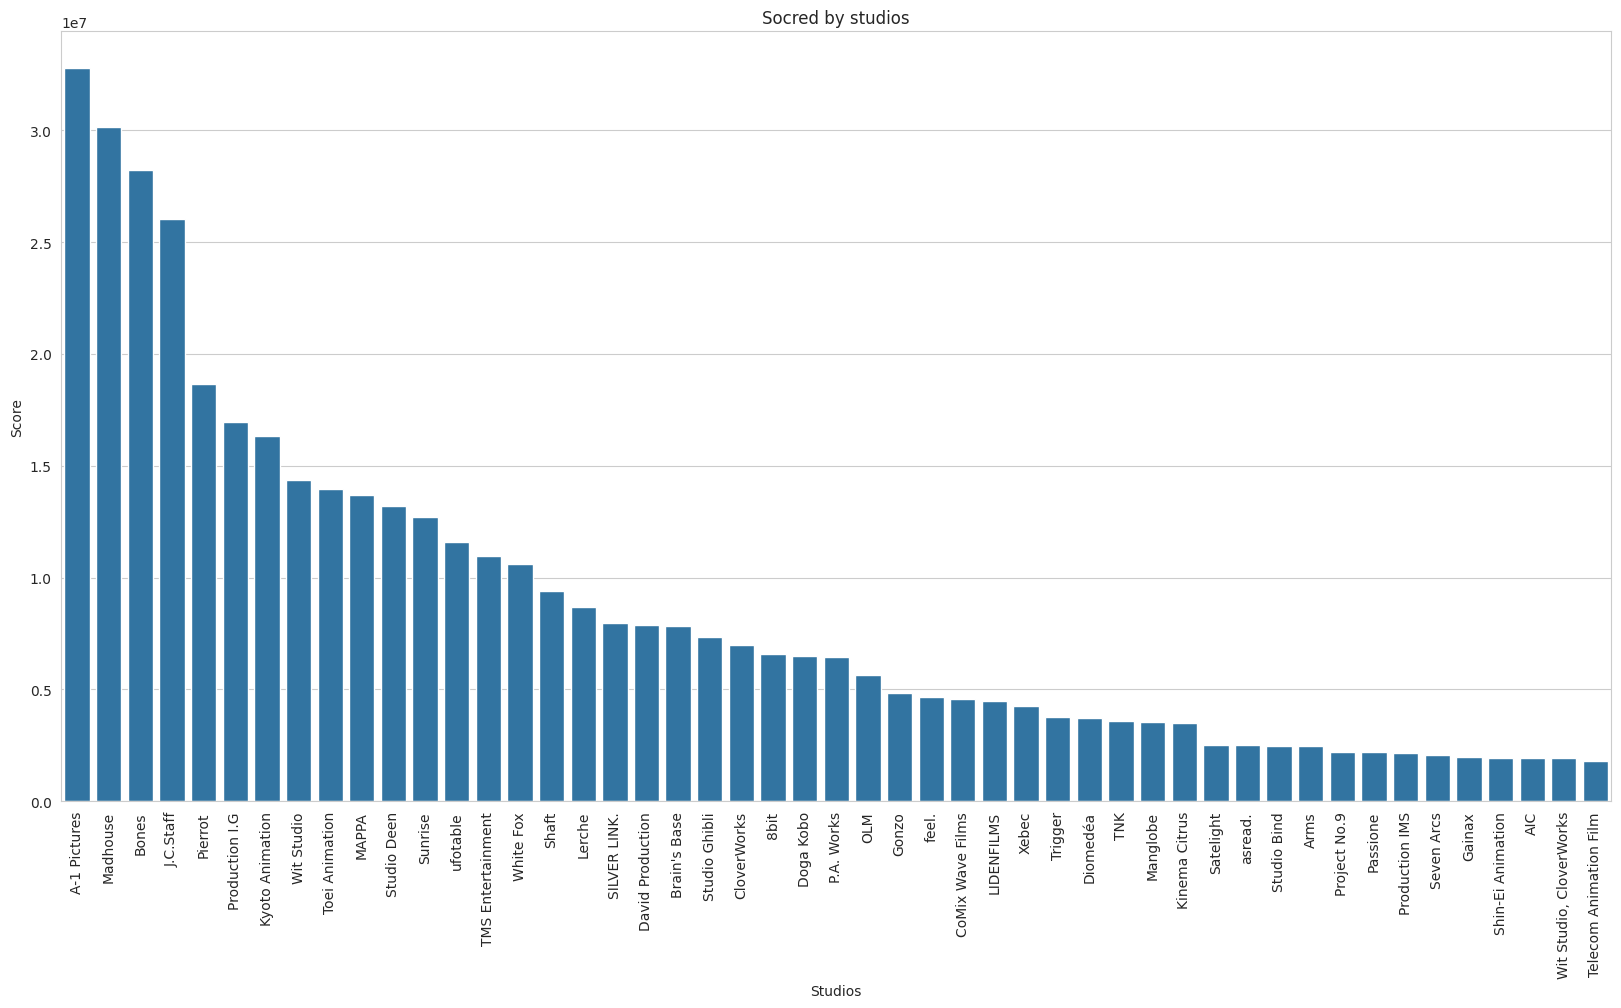

In [17]:
studios = df[['studios','scored_by']].groupby('studios').sum().sort_values(by = 'scored_by', ascending = False).head(49)
studios
with sns.axes_style('whitegrid'):
    plt.figure(figsize= (20,10))
    grafico = sns.barplot(data = studios, x = 'studios', y = 'scored_by')
    grafico.set(title = 'Socred by studios', xlabel = 'Studios', ylabel = 'Score')
    plt.xticks(rotation = 90)

In [18]:
studios

,scored_by
studios,
A-1 Pictures,32779882
Madhouse,30146618
Bones,28214644
J.C.Staff,26023530
Pierrot,18674311
Production I.G,16957589
Kyoto Animation,16346499
Wit Studio,14385016
Toei Animation,13970781


Score by classification

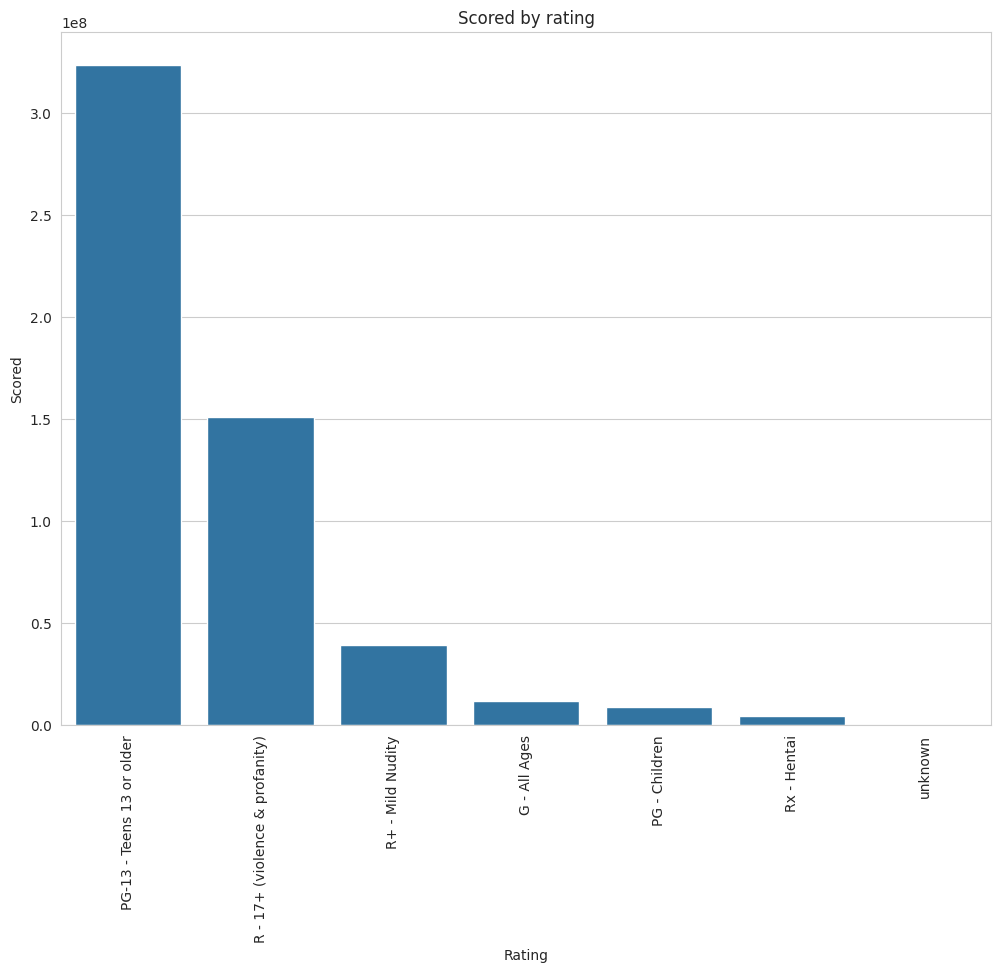

In [23]:
rainting = df[['rating','scored_by']].groupby('rating').sum().sort_values(by = 'scored_by', ascending = False) 
rainting

with sns.axes_style('whitegrid'):
    plt.figure(figsize = (12,9))
    grafico = sns.barplot(data= rainting, x = 'rating', y = 'scored_by')
    grafico.set(title = 'Scored by rating', xlabel = 'Rating', ylabel = 'Scored')
    plt.xticks(rotation = 90)
    

In [24]:
rainting

,scored_by
rating,
PG-13 - Teens 13 or older,323455383
R - 17+ (violence & profanity),150730559
R+ - Mild Nudity,39121208
G - All Ages,11768180
PG - Children,8780581
Rx - Hentai,4399320
unknown,30500


Top 30 movies score 

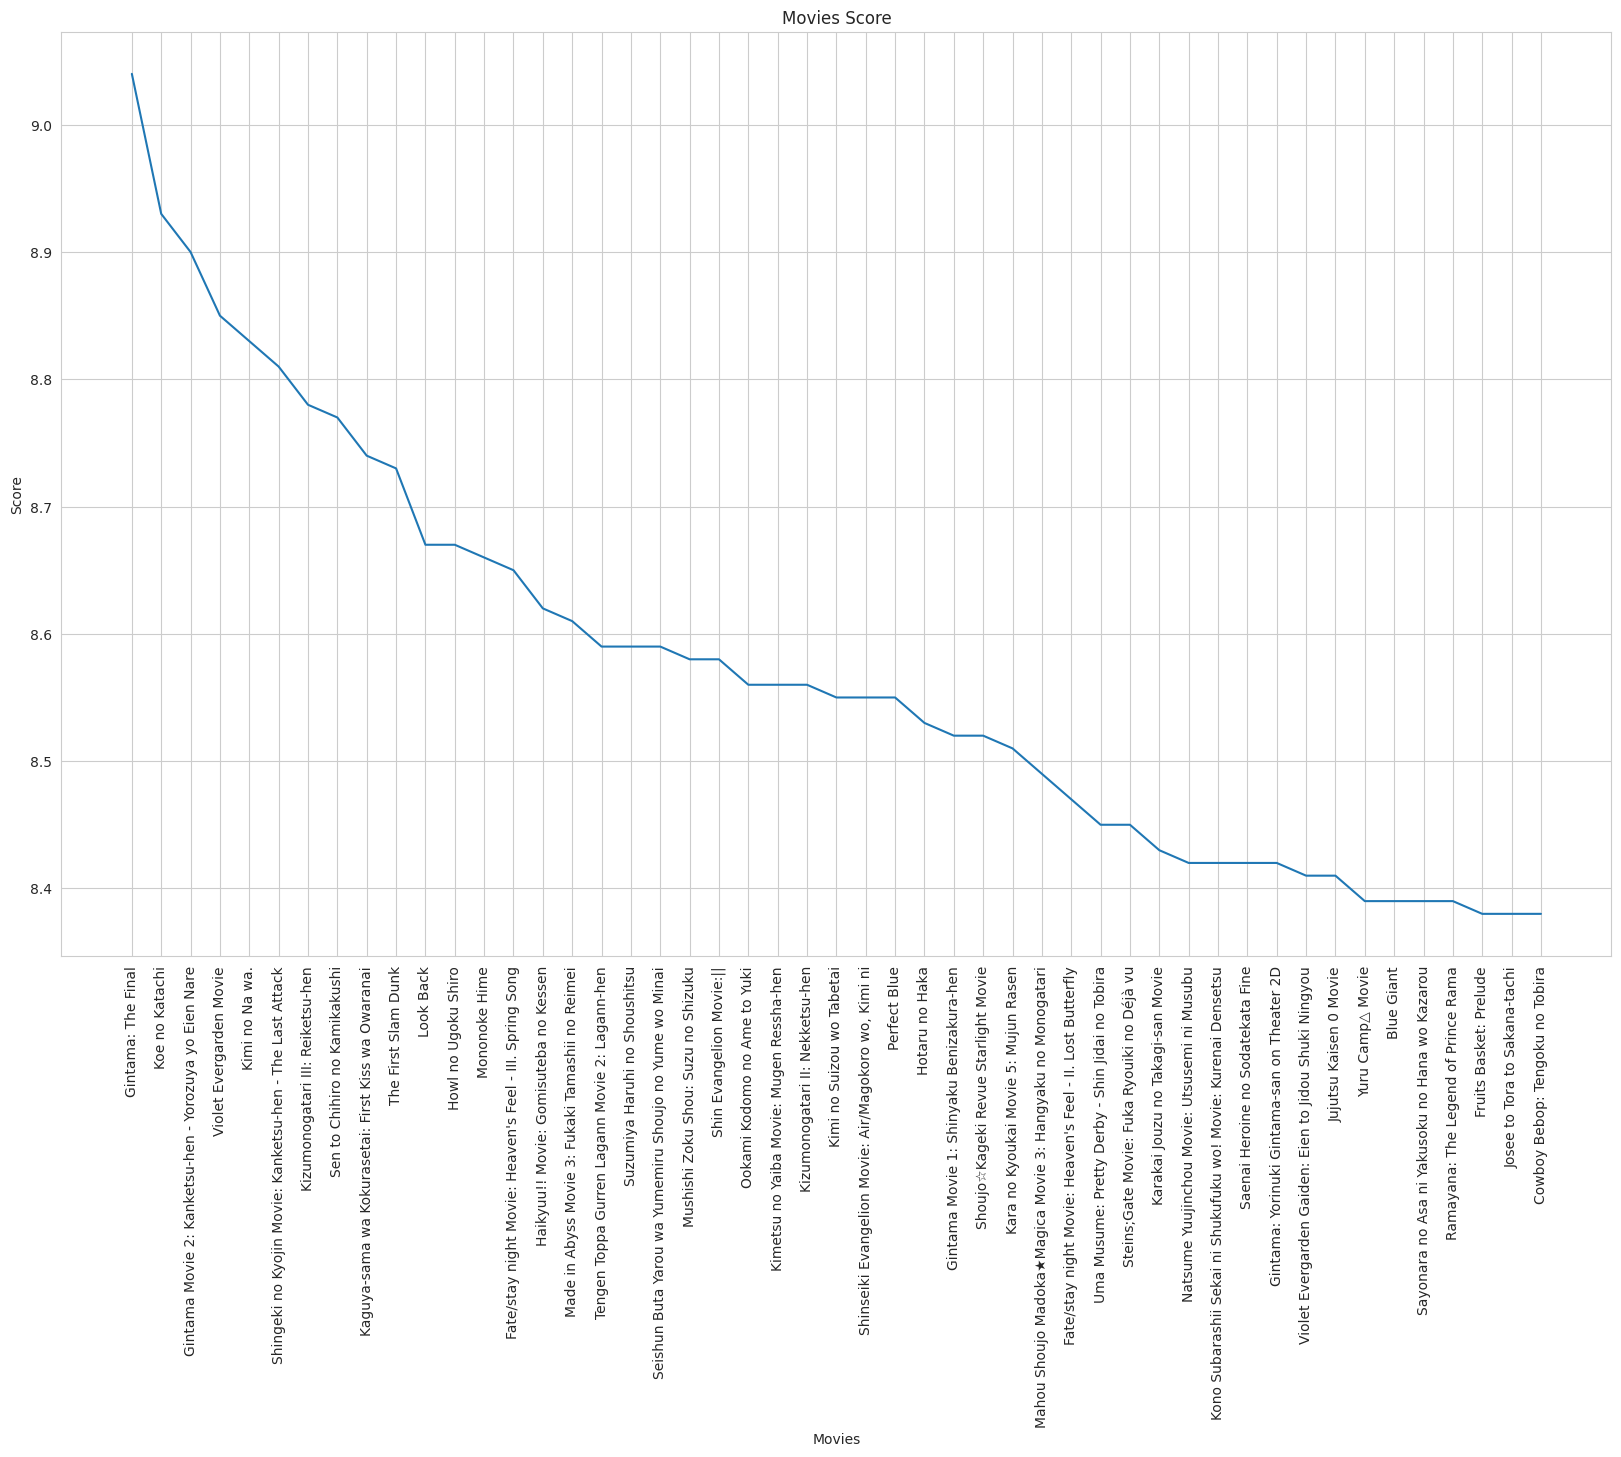

In [21]:
movies = df.query('type == "Movie"')
movies = movies[['name','score']].sort_values(by = 'score', ascending = False).reset_index(drop=True).head(50)
movies
with sns.axes_style('whitegrid'):
    plt.figure(figsize = (20,12))
    grafico = sns.lineplot(data = movies, x = 'name', y = 'score')
    grafico.set(title = 'Movies Score', xlabel = 'Movies', ylabel = 'Score')
    plt.xticks(rotation = 90)


In [22]:
movies

,name,score
0,Gintama: The Final,9.04
1,Koe no Katachi,8.93
2,Gintama Movie 2: Kanketsu-hen - Yorozuya yo Ei...,8.90
3,Violet Evergarden Movie,8.85
4,Kimi no Na wa.,8.83
5,Shingeki no Kyojin Movie: Kanketsu-hen - The L...,8.81
6,Shingeki no Kyojin Movie: Kanketsu-hen - The L...,8.81
7,Kizumonogatari III: Reiketsu-hen,8.78
8,Sen to Chihiro no Kamikakushi,8.77
9,Kaguya-sama wa Kokurasetai: First Kiss wa Owar...,8.74
